## Ejercicio de práctica

Ahora vamos a llevar a la práctica lo que hemos aprendido en el día de hoy.
Supongamos que un compañero trabaja en una unidad de ictus y nos pide que le ayudemos con su base de datos. Quiere unas cuantas gráficas para un congreso que tiene proximamente. El problema es que nuestro compañero ha ido haciendo la base de datos directamente en excel (cosa poco recomendable) y los datos están algo desordenados. La base de datos la tendréis que descargar desde la plataforma, alojándola directamente en el directorio en el que vayais a trabajar

In [30]:
# ¿En qué directorio estoy?

import os

print(os.getcwd())

/Users/adrianvalls/Desktop/Nuevo Curso NNTT/Jueves 21


Una vez que hemos alojado los datos ahí copiamos y pegamos la base de datos en el directorio. 

In [55]:
# Cargamos la base de datos

import pandas as pd
import numpy as np

base = pd.read_excel("base.xlsx")

Aunque parezca que no hayamos hecho nada, la base de datos estará cargada en la memoria RAM del ordenador

In [54]:
# Vamos a ver qué forma tiene la base
# Esto lo tienes que hacer tú

base.head()

,edad,sexo,fumador,hta,diabetes,dislipemia,fa,mRS BASAL,NIHSS,TAS,TAD,rtpa,tiempo_isquemia,mrs_final,iot
0,70,Mujer,Fumador,No,No,No,No,2,23.0,140,85,No,250,1,No
1,85,Hombre,No,No,No,No,Fibrilacion auricular,2,12.0,170,90,No,281,2,No
2,86,Hombre,No,Si,No,No,Fibrilacion auricular,0,15.0,140,83,Si,337,1,No
3,52,Mujer,No,No,No,No,No,0,4.0,153,55,No,694,0,No
4,85,Hombre,No,Si,Si,Dislipemia,No,0,18.0,150,95,Si,297,0,No


Podemos apreciar que nuestro compañero no ha codificado bien algunas cosas. Por ejemplo vamos a ver qué pasa con las categorías de dislipemia y FA

In [38]:
# Vemos que pasa con dislipemia

base.groupby("dislipemia").dislipemia.count()

dislipemia
Dislipemia      451
Dislipidemia      3
No              480
dislipemia        3
Name: dislipemia, dtype: int64

Al parecer ha escrito dislipemia, dislipidemia, y dislipemia con minúscula. Tenemos que recategorizar.

In [39]:
# Recategorizando

base['dislipemia']=base['dislipemia'].replace({"No":"No", "Dislipemia":"Dislipemia", 
                                               "dislipemia": "Dislipemia", "Dislipidemia":"Dislipemia"})

In [40]:
# Comprobamos que se ha recategorizado de forma adecuada

base.groupby("dislipemia").dislipemia.count()

dislipemia
Dislipemia    457
No            480
Name: dislipemia, dtype: int64

Como vemos, ahora sí que hemos conseguido mejorar lo anterior

In [41]:
# Vemos que pasa lo mismo con FA, ahora hazlo tu

base.groupby("fa").fa.count()

fa
FA                       169
Fibrilacion auricular    289
No                       478
Name: fa, dtype: int64

In [ ]:
# Tu codigo 





Nuestro compañero también ha hecho algo raro en la categoría de NIHSS, TAS y TAD

In [56]:
# Vemos que pasa con la categoría NIHSS

base.groupby("NIHSS").NIHSS.count()

NIHSS
0            3
1            3
2            1
3           12
4           13
5           15
6           15
7           30
8           27
9           29
10          24
11          31
12          21
13          28
14          34
15          47
16          55
17          59
18          61
19          61
20          48
21          48
22          54
23          63
24          39
25          43
26          14
27           7
28           3
29           3
30           4
32           2
33           1
34           2
36           3
37           1
IOT         26
Intubado     4
N/D          3
Name: NIHSS, dtype: int64

In [80]:
# Tenemos que crear una nueva variable que sea si está intubado, y en caso de que lo esté poner como NaN (valor perdido)

base = base.assign(iot = lambda x: x['NIHSS'].apply(lambda y: "IOT" if y in ("IOT", "Intubado") else "No"))
# (Tal vez esta expresión está fuera de los límites de este curso, por lo que no os agobieis si no lo entendeis)

In [81]:
# Comprobamos que hemos realizado de forma correcta la reasignación

base.groupby("iot").iot.count()

iot
IOT     30
No     907
Name: iot, dtype: int64

In [82]:
# Ahora vamos a convertir aquellos valores de NIHSS que ponía IOT, Intubado o N/D como Nan

base["NIHSS"] = base["NIHSS"].replace({"Intubado":np.nan, "IOT": np.nan, "N/D": np.nan})

In [83]:
# Comprobamos que hemos cambiado 

base.groupby("NIHSS").NIHSS.count()

NIHSS
0.0      3
1.0      3
2.0      1
3.0     12
4.0     13
5.0     15
6.0     15
7.0     30
8.0     27
9.0     29
10.0    24
11.0    31
12.0    21
13.0    28
14.0    34
15.0    47
16.0    55
17.0    59
18.0    61
19.0    61
20.0    48
21.0    48
22.0    54
23.0    63
24.0    39
25.0    43
26.0    14
27.0     7
28.0     3
29.0     3
30.0     4
32.0     2
33.0     1
34.0     2
36.0     3
37.0     1
Name: NIHSS, dtype: int64

In [63]:
# Nuestro compañero ha hecho lo mismo con las categorías de TAS, TAD, y tiempo_isquemia

base.groupby("tas").tas.count()


# Aquí va tu código para sustituir "N/D" por perdido (NaN o np.nan)




tas
80      2
85      1
90      2
95      2
96      1
       ..
225     1
228     2
240     1
250     1
N/D    33
Name: tas, Length: 120, dtype: int64

In [64]:
# Lo mismo con TAD

base.groupby("tad").tad.count()

# Sustituye "N/D" por np.nan



tad
36      1
40      2
45      2
48      1
50      9
       ..
128     1
130     3
140     1
165     1
N/D    33
Name: tad, Length: 81, dtype: int64

In [65]:
# Igual con tiempo_isquemia

base.groupby("tiempo_isquemia").tiempo_isquemia.count()



tiempo_isquemia
70       1
98       1
107      1
108      1
112      1
        ..
1412     1
1480     1
1600     1
1950     1
N/D     54
Name: tiempo_isquemia, Length: 332, dtype: int64

Ahora que tenemos los datos bien ordenados vamos a hacer un breve resumen 

In [84]:
# Primero comprobamos qué tipo de datos tenemos

base.dtypes

edad                 int64
sexo                object
fumador             object
hta                 object
diabetes            object
dislipemia          object
fa                  object
mRS BASAL            int64
NIHSS              float64
tas                 object
tad                 object
rtpa                object
tiempo_isquemia     object
mrs_final           object
iot                 object
dtype: object

Si hemos hecho mal los cambios vemos que aunque la edad si que nos la toma como cuantitativa, otras que son cuantitativas tambien, como tas o tad, o tambien tiempo_isquemia las toma como si fuera cualitativas. Tenemos que transformarlas antes de hacer cualquier estudio. 

In [85]:
# Esta transformación la podemos hacer con el siguiente código

base["NIHSS"].astype(str).astype(int)

# Sin embargo si no habeis quitado en "N/D" os seguirá dando error

ValueError: invalid literal for int() with base 10: '23.0'

In [87]:
# Ahora podéis hacer un breve resumen de las variables 

base[["edad", "NIHSS"]].describe()

# Podéis poner más variables del mismo tipo (en este caso numéricas)

,edad,NIHSS
count,937.000000,904.000000
mean,69.742796,16.850664
std,14.100411,6.407951
min,11.000000,0.000000
25%,61.000000,13.000000
50%,72.000000,18.000000
75%,80.000000,22.000000
max,97.000000,37.000000


In [90]:
# Podéis hacer lo mismo con variables categóricas 
# Esta es otra forma a la que hemos hecho con anterioridad

base["fa"].value_counts()

No                       478
Fibrilacion auricular    289
FA                       169
Name: fa, dtype: int64

Con lo que has aprendido en las anteriores clases intenta realizar alguna representación gráfica de los datos anteriores

<AxesSubplot:xlabel='hta', ylabel='count'>

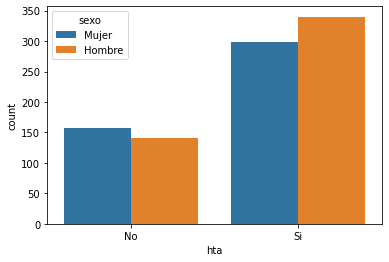

In [92]:
# El primer paso es cargar las librerías

import matplotlib.pyplot as plt 
import seaborn as sns

# Si especificamos hue, nos separa por cada una de las clases

sns.countplot(data = base, x = "hta", 
              hue="sexo")

In [ ]:
# Ahora intenta tú realizar algún tipo de representación gráfica
# Puedes usar lo aprendido en clase, aunque también puedes buscar en internet otras formas de representacion


